## Edge Detection:
Detecting objects in an image is an important aspect of image processing. To detect objects, we need to divide the image into areas corresponding to different objects by using **edge detection**. Edge detection is done by searching for pixels where there is a sharp change in intensity or color. 

It is very useful in reducing the amount of data to be processed by filtering out irrelevant data while keeping important structural features of an image. For example, when we are classifying objects, we may not need all the minute details of the images. Using the outlines of the objects in the image may provide enough data for the classifier to do its job and it would be much more computationally efficient. 

We can detect the edges of the objects by using many different algorithms. First, we will work on Sobel, Prewitt and Scharr filters from the skimage library. Then, we will explore the Canny algorithm.

### Sobel, Prewitt and Scharr Filters:
An edge detector is essentially a high-pass filter that allows high-frequency signals to go through and low-frequency signals to be suppressed. Edges of objects are the high-frequency components, so when we apply an edge detecting filter to an image, we amplify the edges and suppress the rest.
In the following, we will apply Sobel, Prewitt and Scharr filters to a candy image. 

In [12]:
#Import the necessary libraries
import matplotlib.pyplot as plt 
import numpy as np
import skimage.io
from skimage.filters import sobel, prewitt, scharr
from  skimage.feature import canny
from skimage.feature import corner_harris
from skimage.feature import corner_peaks

In [13]:
candy = skimage.io.imread('candy.jpg')
#Turn candy image to grayscale.
gray_candy = skimage.color.rgb2gray(candy)
#Apply Sobel filter to the image 'gray_candy' 
sobel_filtered_candy  = sobel(gray_candy)
#Apply Prewitt filter to the image 'gray_candy'
prewitt_filtered_candy = prewitt(gray_candy)
#Apply Scharr filter to the image 'gray_candy'
scharr_filtered_candy = scharr(gray_candy)

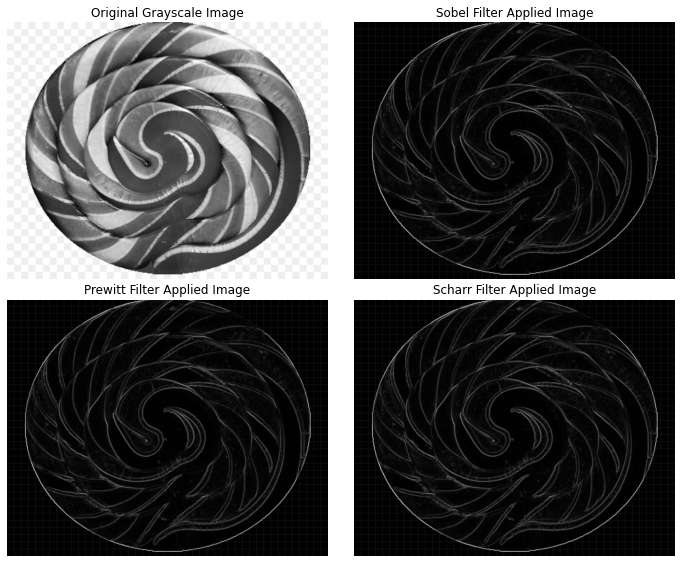

In [14]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10,8), sharex=True, sharey=True)
ax = ax.ravel()
fig.tight_layout()
#Plot the original image
ax[0].imshow(gray_candy, cmap=plt.cm.gray)
ax[0].set_title('Original Grayscale Image')
#Plot the Sobel filter applied image
ax[1].imshow(sobel_filtered_candy, cmap=plt.cm.gray)
ax[1].set_title('Sobel Filter Applied Image')
#Plot the Prewitt filter applied image
ax[2].imshow(prewitt_filtered_candy, cmap=plt.cm.gray)
ax[2].set_title('Prewitt Filter Applied Image')
#Plot the Scharr filter applied image
ax[3].imshow(scharr_filtered_candy, cmap=plt.cm.gray)
ax[3].set_title('Scharr Filter Applied Image')
for a in ax:
    a.axis('off')

## Canny Edge Detection:
Canny edge detection technique is considered to be the standard edge detection method in image processing, thanks to its ability to provide the highest accuracy in edge detection in shorter time than the other techniques.  
Canny algorithm applies a Gaussian filter with the default sigma value of 1 to denoise the image before detecting edges. In the following, we will apply Canny technique to the candy image with two sigma values; one with the default value and one with the value of 0.1. Smaller sigma value means removing less details yielding to more edges being shown in the end result. Let's see if we are correct:    

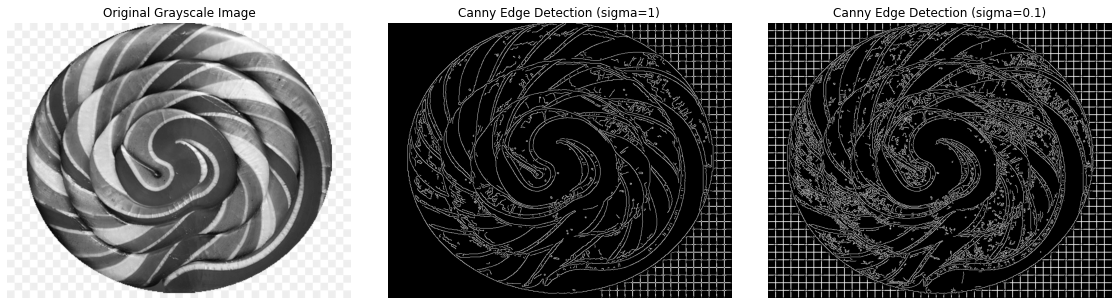

In [15]:
#Apply Canny with sigma=1
canny_candy_default = canny(gray_candy)
#Apply Canny with sigma=0.1
canny_candy_tenth = canny(gray_candy, sigma=0.1)
#Plot figures
fig, ax = plt.subplots(ncols=3, figsize=(16, 14), sharex=True)
#Plot the original image
ax[0].imshow(gray_candy, cmap=plt.cm.gray)
ax[0].set_title('Original Grayscale Image')
#Plot Canny filtered image with sigma=1
ax[1].imshow(canny_candy_default, cmap=plt.cm.gray)
ax[1].set_title('Canny Edge Detection (sigma=1)')
#Plot Canny filtered image with sigma=0.1
ax[2].imshow(canny_candy_tenth, cmap=plt.cm.gray)
ax[2].set_title('Canny Edge Detection (sigma=0.1)')
plt.tight_layout()
for a in ax:
    a.axis('off')
plt.show()

As we expected, Canny produced a much more detailed image with a smaller sigma value. 

Overall, Canny's result is far better than anything we obtained with Sobel, Prewitt or Scharr filters. The background squares are more visible, and the lines in the candy look much more detailed. 

## Corner Detection:
We can use **skimage.feature.corner_harris()** to detect corners in an image. Let's see if this function can detect the corners in the following image.

(-0.5, 979.5, 700.5, -0.5)

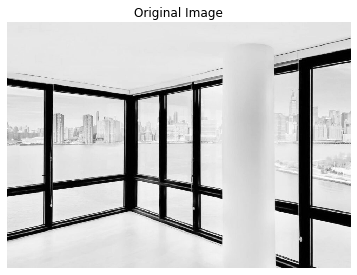

In [18]:
#Load the image
image = skimage.io.imread('corners.jpg')
#Turn image to grayscale
gray_image = skimage.color.rgb2gray(image)
#Denoise the image
gray_image = skimage.filters.gaussian(gray_image, sigma=0.1)
#Display obtained image
skimage.io.imshow(gray_image)
plt.title('Original Image')
plt.axis('off')

In [30]:
corners = corner_harris(gray_image)

701

In [27]:
points = corner_peaks(corner_harris(corners), min_distance=1,threshold_abs=0.001,threshold_rel=0.01)
print('{} corners were found in the image.'.format(len(points)))

56 corners were found in the image.


Let's mark these detected corners on the image with red marker:

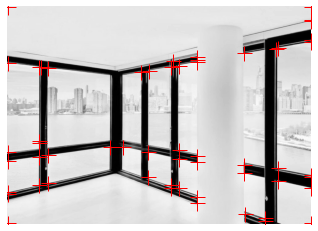

In [21]:
plt.imshow(gray_image, cmap='gray')
plt.plot(points[:,1], points[:,0], '+r', markersize=15)
plt.axis('off')
plt.show()


Object detection is a very important aspect of image processing. Here we explored some popular techniques of edge and corner detection.